<a href="https://colab.research.google.com/github/sheoranabhishek/predictor_covid19/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('covid.csv')

In [10]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,12/31/2019,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,1/1/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,1/2/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,1/3/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,1/4/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [11]:
df.shape

(40959, 40)

In [12]:
df.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [13]:
df['location'].value_counts()

Qatar             246
China             246
Switzerland       246
Belgium           246
Singapore         246
                 ... 
Western Sahara    129
Tajikistan        124
Comoros           123
Lesotho           110
Hong Kong          18
Name: location, Length: 212, dtype: int64

In [14]:
df.isna().any()

iso_code                            True
continent                           True
location                           False
date                               False
total_cases                         True
new_cases                           True
new_cases_smoothed                  True
total_deaths                        True
new_deaths                          True
new_deaths_smoothed                 True
total_cases_per_million             True
new_cases_per_million               True
new_cases_smoothed_per_million      True
total_deaths_per_million            True
new_deaths_per_million              True
new_deaths_smoothed_per_million     True
new_tests                           True
total_tests                         True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_per_case                      True
positive_rate                       True
tests_units     

In [ ]:
df.isna().sum()

iso_code                             246
continent                            492
location                               0
date                                   0
total_cases                          575
new_cases                            757
new_cases_smoothed                  1539
total_deaths                         575
new_deaths                           757
new_deaths_smoothed                 1539
total_cases_per_million              821
new_cases_per_million                821
new_cases_smoothed_per_million      1604
total_deaths_per_million             821
new_deaths_per_million               821
new_deaths_smoothed_per_million     1604
new_tests                          27847
total_tests                        27516
total_tests_per_thousand           27516
new_tests_per_thousand             27847
new_tests_smoothed                 26217
new_tests_smoothed_per_thousand    26217
tests_per_case                     27329
positive_rate                      26973
tests_units     

In [ ]:
df.describe(include="O")

,iso_code,continent,location,date,tests_units
count,40713,40467,40959,40959,15497
unique,211,6,212,246,5
top,TWN,Europe,Philippines,8/10/2020,tests performed
freq,246,10896,246,212,8176


In [15]:
india_data = df[df['location']=='India']

In [16]:
india_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17096,IND,Asia,India,12/31/2019,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17097,IND,Asia,India,1/1/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17098,IND,Asia,India,1/2/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17099,IND,Asia,India,1/3/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17100,IND,Asia,India,1/4/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [17]:
india_data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17337,IND,Asia,India,8/28/2020,3387500.0,77266.0,68811.000,61529.0,1057.0,954.286,2454.702,55.990,49.863,44.586,0.766,0.692,928761.0,40406609.0,29.280,0.673,845077.0,0.612,12.281,0.081,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17338,IND,Asia,India,8/29/2020,3463972.0,76472.0,69753.000,62550.0,1021.0,965.143,2510.117,55.414,50.545,45.326,0.740,0.699,1055027.0,41461636.0,30.045,0.765,881345.0,0.639,12.635,0.079,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17339,IND,Asia,India,8/30/2020,3542733.0,78761.0,71113.286,63498.0,948.0,970.286,2567.190,57.073,51.531,46.013,0.687,0.703,846278.0,42307914.0,30.658,0.613,892578.0,0.647,12.551,0.080,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17340,IND,Asia,India,8/31/2020,3621245.0,78512.0,73556.714,64469.0,971.0,989.571,2624.082,56.893,53.302,46.717,0.704,0.717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17341,IND,Asia,India,9/1/2020,3691166.0,69921.0,74834.714,65228.0,759.0,976.857,2674.749,50.667,54.228,47.267,0.550,0.708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


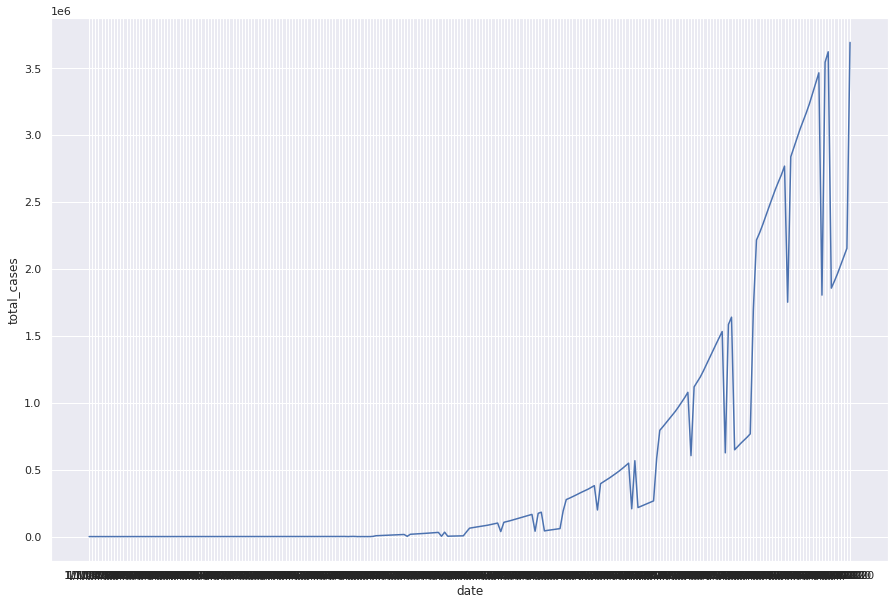

In [19]:
#Total cases per day
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_cases',data=india_data)
plt.show()

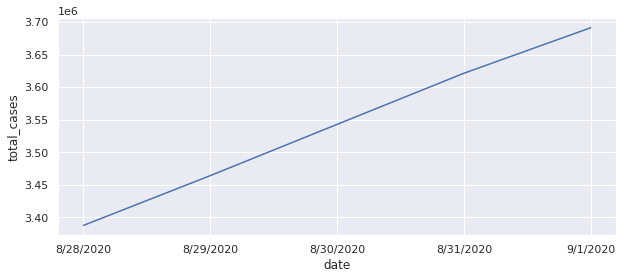

In [20]:
#Visualizing the last 5 days data
last_5_days = india_data.tail()
sns.set(rc={'figure.figsize':(10,4)})
sns.lineplot(x='date',y='total_cases',data=last_5_days)
plt.show()


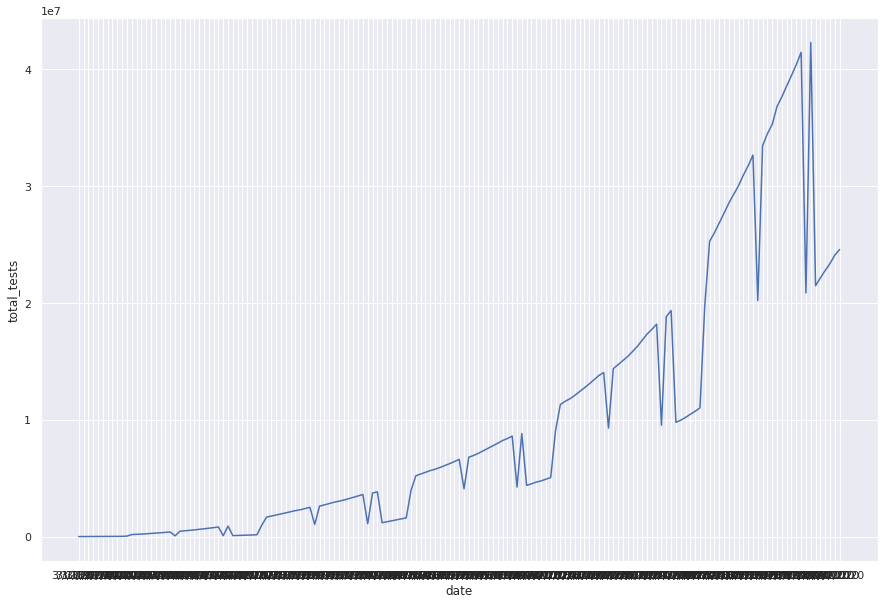

In [21]:
#Total tests per day (entire covid period)
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_tests',data=india_data)
plt.show()

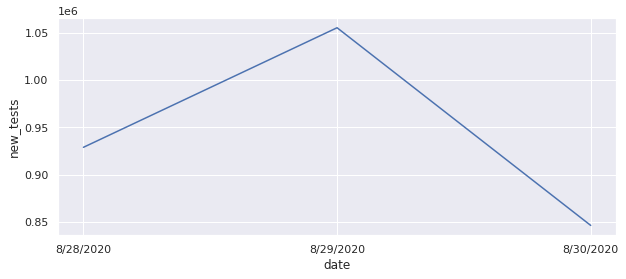

In [22]:
#Tests in last 5 days
sns.set(rc={'figure.figsize':(10,4)})
sns.lineplot(x='date',y='new_tests',data=last_5_days)
plt.show()


In [23]:
india_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17096,IND,Asia,India,12/31/2019,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17097,IND,Asia,India,1/1/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17098,IND,Asia,India,1/2/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17099,IND,Asia,India,1/3/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17100,IND,Asia,India,1/4/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [24]:
from sklearn.model_selection import train_test_split

In [ ]:
#Implementing Linear Regression


In [25]:
#string date to date time object
import datetime as dt
india_data['date'] = pd.to_datetime(india_data['date'])
india_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17096,IND,Asia,India,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17097,IND,Asia,India,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17098,IND,Asia,India,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17099,IND,Asia,India,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17100,IND,Asia,India,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [26]:
#Converting dates to ordinal for ease of computation
india_data['date'] = india_data['date'].map(dt.datetime.toordinal)
india_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17096,IND,Asia,India,737424,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17097,IND,Asia,India,737425,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17098,IND,Asia,India,737426,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17099,IND,Asia,India,737427,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17100,IND,Asia,India,737428,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [28]:
india_data.fillna(0)
india_data_temp  = india_data.dropna(axis=0,subset=['total_cases'])

In [30]:
#train_test_split
x1 = india_data_temp['date']
y1 = india_data_temp['total_cases']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3)

In [31]:
india_data_temp['total_cases'].isna().sum()

0

In [32]:
from sklearn.linear_model import LinearRegression

#initializing the model

total_case_model = LinearRegression()

In [33]:
x1_train = np.array(x1_train).reshape(-1,1)
y1_train = np.array(y1_train).reshape(-1,1)

In [34]:
np.isnan(y1_train)
np.nan_to_num(y1_train)

array([[3.000000e+00],
       [9.616900e+04],
       [0.000000e+00],
       [3.000000e+00],
       [2.789200e+04],
       [3.000000e+00],
       [8.594000e+04],
       [6.715200e+04],
       [5.634200e+04],
       [2.301000e+03],
       [2.027074e+06],
       [1.905350e+05],
       [0.000000e+00],
       [3.540650e+05],
       [2.396637e+06],
       [1.517670e+05],
       [2.702742e+06],
       [1.987060e+05],
       [2.975701e+06],
       [0.000000e+00],
       [3.000000e+00],
       [7.500000e+01],
       [5.620000e+02],
       [1.143800e+04],
       [0.000000e+00],
       [7.424170e+05],
       [4.402150e+05],
       [2.307700e+04],
       [1.908254e+06],
       [3.167323e+06],
       [2.905823e+06],
       [1.483156e+06],
       [8.495530e+05],
       [7.240000e+02],
       [2.649600e+04],
       [1.965000e+03],
       [0.000000e+00],
       [5.854930e+05],
       [8.730000e+02],
       [5.668400e+05],
       [1.000000e+00],
       [2.215074e+06],
       [3.324240e+05],
       [2.7

In [ ]:
np.isnan(y1_train).sum()

0

In [35]:
total_case_model.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
x1_test = np.array(x1_test).reshape(-1,1)

y_pred = total_case_model.predict(x1_test)

In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y1_test,y_pred)

256445430845.7866

In [38]:
from sklearn.metrics import r2_score
r2_score(y1_test,y_pred)

0.6187552773705274

In [ ]:
india_data_temp.shape

(245, 40)

In [40]:
from sklearn.externals import joblib

joblib.dump(total_case_model,'Basic_Model_1.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Basic_Model_1.pkl']

In [41]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01)
rr.fit(x1_train,y1_train);

joblib.dump(rr,"total_case_model.pkl")

['total_case_model.pkl']

In [42]:
rr_train_score = rr.score(x1_train,y1_train)
print(rr_train_score*100)
rr_test_score = rr.score(x1_test,y1_test)
print(rr_test_score*100)

57.75686182089472
61.87552794867042


In [43]:
rr100 = Ridge(alpha=100)
rr100.fit(x1_train,y1_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
rr100_train_score = rr100.score(x1_train,y1_train)
print(rr100_train_score*100)
rr_100_test_score = rr100.score(x1_test,y1_test)
print(rr_test_score*100)
 

57.756861033983995
61.87552794867042


In [45]:
india_data_temp.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17096,IND,Asia,India,737424,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17097,IND,Asia,India,737425,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17098,IND,Asia,India,737426,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17099,IND,Asia,India,737427,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17100,IND,Asia,India,737428,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [46]:
india_data_temp['total_deaths'].isna().any()

False

In [61]:
#Preparing the total_death model

x2 = india_data_temp['date']
y2 = india_data_temp['total_deaths']

#train_test_split

x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size = 0.3)

In [62]:
x2_train = np.array(x2_train).reshape(-1,1)
y2_train = np.array(y2_train).reshape(-1,1)


In [63]:
np.isnan(y2_train).sum()

0

In [64]:
total_death_model = LinearRegression()

In [65]:
total_death_model.fit(x2_train,y2_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
x2_test = np.array(x2_test).reshape(-1,1)
y2_pred  = total_death_model.predict(x2_test)

In [71]:
r2_score(y2_test,y2_pred)*100

69.37075241362348

In [72]:
joblib.dump(total_death_model,'total_deaths_model.pkl')

['total_deaths_model.pkl']

In [73]:
#Total Recovery model

india_data_temp.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17096,IND,Asia,India,737424,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17097,IND,Asia,India,737425,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17098,IND,Asia,India,737426,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17099,IND,Asia,India,737427,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17100,IND,Asia,India,737428,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [74]:
india_data_temp.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17337,IND,Asia,India,737665,3387500.0,77266.0,68811.000,61529.0,1057.0,954.286,2454.702,55.990,49.863,44.586,0.766,0.692,928761.0,40406609.0,29.280,0.673,845077.0,0.612,12.281,0.081,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17338,IND,Asia,India,737666,3463972.0,76472.0,69753.000,62550.0,1021.0,965.143,2510.117,55.414,50.545,45.326,0.740,0.699,1055027.0,41461636.0,30.045,0.765,881345.0,0.639,12.635,0.079,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17339,IND,Asia,India,737667,3542733.0,78761.0,71113.286,63498.0,948.0,970.286,2567.190,57.073,51.531,46.013,0.687,0.703,846278.0,42307914.0,30.658,0.613,892578.0,0.647,12.551,0.080,samples tested,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17340,IND,Asia,India,737668,3621245.0,78512.0,73556.714,64469.0,971.0,989.571,2624.082,56.893,53.302,46.717,0.704,0.717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17341,IND,Asia,India,737669,3691166.0,69921.0,74834.714,65228.0,759.0,976.857,2674.749,50.667,54.228,47.267,0.550,0.708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [84]:
temp_data = pd.read_csv('covid_19_india.csv')

In [85]:
temp_data.shape

(6631, 9)

In [86]:
temp_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [87]:
temp_data.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
6626,6627,24/09/20,8:00 AM,Telengana,-,-,148139,1070,179246
6627,6628,24/09/20,8:00 AM,Tripura,-,-,16978,260,23789
6628,6629,24/09/20,8:00 AM,Uttarakhand,-,-,31324,529,43720
6629,6630,24/09/20,8:00 AM,Uttar Pradesh,-,-,302689,5299,369686
6630,6631,24/09/20,8:00 AM,West Bengal,-,-,205028,4544,234673


In [89]:
temp = temp_data['Cured'].groupby(by=temp_data['Date'])

In [91]:
temp.head()

0            0
1            0
2            0
3            0
4            0
         ...  
6596      3494
6597    570667
6598      5903
6599    132712
6600    159022
Name: Cured, Length: 1064, dtype: int64

In [92]:
temp.tail()

0            0
1            0
2            0
3            0
4            0
         ...  
6626    148139
6627     16978
6628     31324
6629    302689
6630    205028
Name: Cured, Length: 1064, dtype: int64